## Lab1 Machine Learning Balumatkina DA-01

#### initializyng all functions + libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

toler = 0.000001
learn_rate = 0.007

def scan_data(file):
    return np.genfromtxt(file, delimiter=",", skip_header=1)


def mse_loss_function(database_row, predicted_row):
    result = sum((predicted_row[i] - database_row[i]) ** 2 for i in range(len(predicted_row)))
    return result / len(predicted_row)


def linear_regression(b0, b1, x):
    return b0 + np.multiply(b1, x)


def build_plot(data, plot_color):
    x_data, y_data = list(data[:, 1]), list(data[:, 2])
    plt.plot(x_data, y_data, plot_color)


def train(rows):
    epoch_numb = 0
    delta = 100

    b0 = np.random.randn(1)
    b1 = np.random.randn(1)

    x_column = rows[:, 1]
    y_column =  rows[:, 2]

    y_predict = [linear_regression(b0, b1, x) for x in x_column]
    loss = mse_loss_function(y_column, y_predict)
   
    while toler < delta:
        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        y_difference = [(expected - predicted) for (expected, predicted) in zip(y_column, y_predict)]

        b0_derivative = - (2 / len(y_difference)) * np.sum(y_difference)
        sum_value = np.dot(x_column, y_difference)
        b1_derivative = - (2 / len(y_difference)) * sum_value

        b0 = b0 - learn_rate * b0_derivative
        b1 = b1 - learn_rate * b1_derivative

        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        current_loss = mse_loss_function(y_column, y_predict)
        delta = loss - current_loss
        loss = current_loss

        print(f"epoch #{epoch_numb}: beta0 = {b0[0]} || beta1 = {b1[0]} || loss = {current_loss[0]}")
        
        epoch_numb += 1

    return {
        "beta0": b0[0],
        "beta1": b1[0],
        "epoch amount": epoch_numb,
        "mse loss function value": loss[0]
    }

#### analyzing training database + building graph

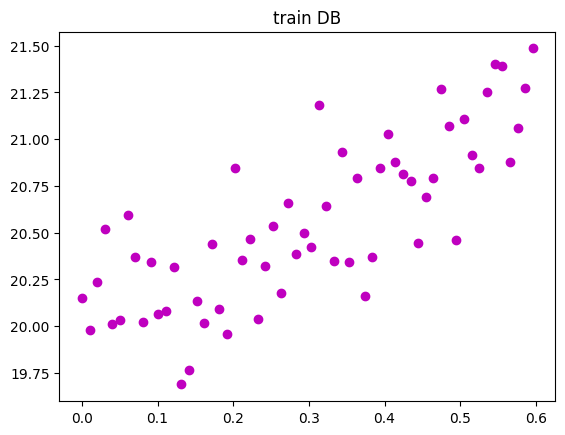

In [2]:
train_DB = scan_data("lab_1_train.csv")
plt.title("train DB")
build_plot(train_DB, 'mo')

In [3]:
train_model_work = train(train_DB)
train_model_work

epoch #0: beta0 = 0.028063984140515252 || beta1 = 1.7324326626525242 || loss = 400.28569085051805
epoch #1: beta0 = 0.3081377539494551 || beta1 = 1.8159945274562797 || loss = 388.1754988276263
epoch #2: beta0 = 0.5839418945147672 || beta1 = 1.8982483303735593 || loss = 376.43252127820364
epoch #3: beta0 = 0.8555416375100959 || beta1 = 1.9792140695103453 || loss = 365.0456226414064
epoch #4: beta0 = 1.1230012179392124 || beta1 = 2.05891143741777 || loss = 354.00400503613525
epoch #5: beta0 = 1.386383889364081 || beta1 = 2.137359825760676 || loss = 343.29719802108247
epoch #6: beta0 = 1.645751938900258 || beta1 = 2.2145783299148407 || loss = 332.9150486652995
epoch #7: beta0 = 1.9011667019831742 || beta1 = 2.2905857534939686 || loss = 322.84771191987124
epoch #8: beta0 = 2.1526885769088064 || beta1 = 2.365400612807506 || loss = 313.0856412815614
epoch #9: beta0 = 2.400377039152182 || beta1 = 2.439041141250352 || loss = 303.61957973958056
epoch #10: beta0 = 2.644290655467111 || beta1 = 2.

{'beta0': 19.897476921960273,
 'beta1': 2.1824810797735994,
 'epoch amount': 8330,
 'mse loss function value': 0.07430781810477542}

#### analyzing test database + building graph

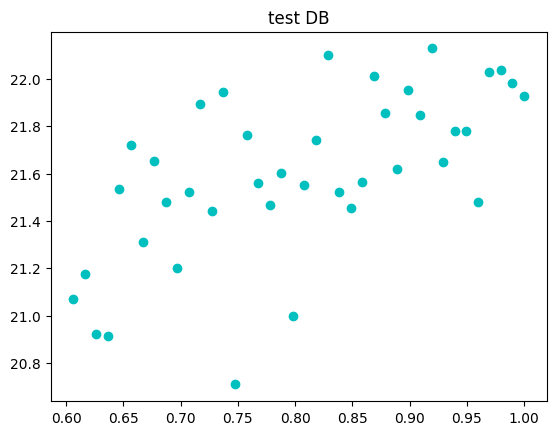

In [4]:
test_DB = scan_data("lab_1_test.csv")
plt.title("test DB")
build_plot(test_DB, 'co')

#### building total graph

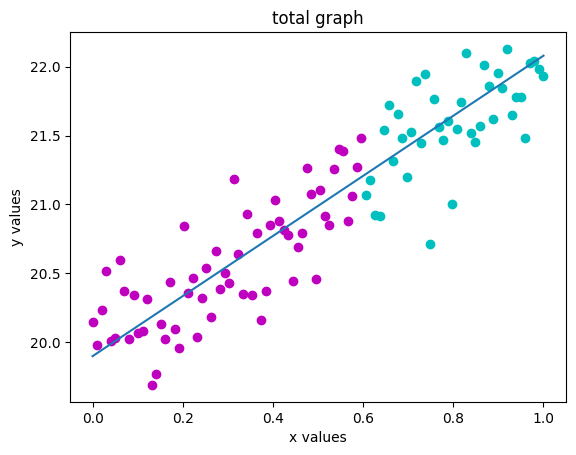

In [5]:
x_train, y_train = list(train_DB[:, 1]), list(train_DB[:, 2])
x_test, y_test = list(test_DB[:, 1]), list(test_DB[:, 2])
plt.title("total graph")
plt.xlabel('x values') 
plt.ylabel('y values') 
plt.plot(x_train, y_train, 'om',
         x_test, y_test, 'oc',
         [0, 1], [linear_regression(train_model_work["beta0"], train_model_work["beta1"], 0), linear_regression(train_model_work["beta0"], train_model_work["beta1"], 1)])

#### Mean Squarred Error loss value (not the best but still)

In [6]:
y_predict = [linear_regression(train_model_work["beta0"], train_model_work["beta1"], x) for x in x_test]
print(f"mse loss value: {mse_loss_function(y_test, y_predict)}")

mse loss value: 0.07711063811488983
